In [1]:
# Library to be used

import requests
from bs4 import BeautifulSoup
import pandas as pd
from tqdm import tqdm  # Import tqdm for showing progress bars

# Adding header for compatibility.
headers = {
    'User-Agent': 'Mozilla/5.0 (Windows NT 6.3; Win 64 ; x64) Apple WeKit /537.36(KHTML , like Gecko) Chrome/80.0.3987.162 Safari/537.36'
}

# Creating empty DataFrame
data = pd.DataFrame(columns=['Job Title', 'Description', 'Experience Reqd', 'Company', 'City', 'Salary Range','Date Posted', 'URL'])  # Move DataFrame creation outside the loop

print("SCRAPPING STARTED...!")


for i in tqdm(range(1, 22), desc="Scraping Progress", unit="page"):  # Here this loop will update url by appending pange no at the last of url, so that we can extract whole data.

    print(f"Scrapping page : {i}")

    # Web url
    url = f"https://www.timesjobs.com/candidate/job-search.html?from=submit&luceneResultSize=25&txtKeywords=0DQT0Data%20Science0DQT0&postWeek=60&searchType=personalizedSearch&actualTxtKeywords=0DQT0Data%20Science0DQT0&searchBy=0&rdoOperator=OR&pDate=I&sequence=2&startPage={i}"

    response = requests.get(url, headers=headers).text
    soup = BeautifulSoup(response, "html.parser")

    outer_tag = soup.find('ul', class_='new-joblist') # Here we will have ul tag which will have all the complete jobs in the current page.
    inner_tag = outer_tag.find_all('li', {"class": 'clearfix job-bx wht-shd-bx'}) # This will have one by one job block in the current page.

    for job in inner_tag:  # From here we will extract one by one records
        title = job.find('h2').text.strip()   # Extracting the title
        com = job.find('h3', class_="joblist-comp-name").text.strip() # Extracting the company name
        exp = job.find('i', class_="material-icons").next_sibling.text.strip()  # Extracting the experience
        city = job.find_all('span')[1].text.strip()   # Extracting the city

        exception = 0
        try:
            Salary = job.find('i', class_="material-icons rupee").next_sibling  # Extracting the salary, somewhere salay is not defined like for frashers (0 experience), so it will handel that case.
        except Exception as e:
            exception = exception + 1
            Salary = 'Not Mentioned'

        date_posted = job.find('span', class_="sim-posted").text.strip() # Extracting the date
        url_link = job.find('a').get('href')     # Extracting the url
        description = job.find('label').next_sibling.strip()    # Extracting the description

        # Appending data to dataframe
        data = pd.concat([data, pd.DataFrame([[title, description, exp, com, city, Salary, date_posted, url_link]],columns=['Job Title', 'Description', 'Experience Reqd', 'Company', 'City','Salary Range', 'Date Posted', 'URL'])], ignore_index=True)

print("SCRAPPING COMPLETED SUCCESSFULLY...!")


SCRAPPING STARTED...!


Scraping Progress:   0%|          | 0/21 [00:00<?, ?page/s]

Scrapping page : 1


Scraping Progress:   5%|▍         | 1/21 [00:01<00:22,  1.15s/page]

Scrapping page : 2


Scraping Progress:  10%|▉         | 2/21 [00:02<00:20,  1.06s/page]

Scrapping page : 3


Scraping Progress:  14%|█▍        | 3/21 [00:03<00:17,  1.01page/s]

Scrapping page : 4


Scraping Progress:  19%|█▉        | 4/21 [00:03<00:16,  1.03page/s]

Scrapping page : 5


Scraping Progress:  24%|██▍       | 5/21 [00:05<00:16,  1.05s/page]

Scrapping page : 6


Scraping Progress:  29%|██▊       | 6/21 [00:06<00:14,  1.00page/s]

Scrapping page : 7


Scraping Progress:  33%|███▎      | 7/21 [00:06<00:13,  1.04page/s]

Scrapping page : 8


Scraping Progress:  38%|███▊      | 8/21 [00:08<00:13,  1.00s/page]

Scrapping page : 9


Scraping Progress:  43%|████▎     | 9/21 [00:09<00:12,  1.03s/page]

Scrapping page : 10


Scraping Progress:  48%|████▊     | 10/21 [00:10<00:11,  1.05s/page]

Scrapping page : 11


Scraping Progress:  52%|█████▏    | 11/21 [00:11<00:10,  1.04s/page]

Scrapping page : 12


Scraping Progress:  57%|█████▋    | 12/21 [00:12<00:10,  1.12s/page]

Scrapping page : 13


Scraping Progress:  62%|██████▏   | 13/21 [00:13<00:08,  1.05s/page]

Scrapping page : 14


Scraping Progress:  67%|██████▋   | 14/21 [00:14<00:07,  1.01s/page]

Scrapping page : 15


Scraping Progress:  71%|███████▏  | 15/21 [00:15<00:05,  1.01page/s]

Scrapping page : 16


Scraping Progress:  76%|███████▌  | 16/21 [00:16<00:04,  1.02page/s]

Scrapping page : 17


Scraping Progress:  81%|████████  | 17/21 [00:17<00:04,  1.11s/page]

Scrapping page : 18


Scraping Progress:  86%|████████▌ | 18/21 [00:18<00:03,  1.09s/page]

Scrapping page : 19


Scraping Progress:  90%|█████████ | 19/21 [00:19<00:02,  1.09s/page]

Scrapping page : 20


Scraping Progress:  95%|█████████▌| 20/21 [00:20<00:01,  1.10s/page]

Scrapping page : 21


Scraping Progress: 100%|██████████| 21/21 [00:22<00:00,  1.05s/page]

SCRAPPING COMPLETED SUCCESSFULLY...!


## Data cleaning and EDA

In [2]:
data.head() # Printing data frame.

,Job Title,Description,Experience Reqd,Company,City,Salary Range,Date Posted,URL
0,Data Science Internship in Pune,Maxgen Technologies pvt ltd offering internshi...,0 - 1 yrs,Maxgen Technologies\n (More Jobs),"Pune, Amravati, Aurangabad, Sangli, Satara",Rs 1.00 - 2.00 Lacs p.a.,Posted few days ago,https://www.timesjobs.com/job-detail/data-scie...
1,Data Science Internship in Pune,Maxgen technologies Pvt ltd offers live projec...,0 - 1 yrs,Maxgen Technologies\n (More Jobs),"Pune, Jalgaon, Kolhapur, Nagpur, Solapur",Rs 1.00 - 2.00 Lacs p.a.,Posted a month ago,https://www.timesjobs.com/job-detail/data-scie...
2,Data Science Internship in Pune,Maxgen Technologies pvt ltd offering internshi...,0 - 1 yrs,Maxgen Technologies\n (More Jobs),"Pune, Amravati, Aurangabad, Sangli, Satara",Rs 1.00 - 2.00 Lacs p.a.,Posted a month ago,https://www.timesjobs.com/job-detail/data-scie...
3,Data Science Internship in Pune,Maxgen technologies Pvt ltd offers live projec...,0 - 1 yrs,Maxgen Technologies\n (More Jobs),"Pune, Jalgaon, Kolhapur, Nagpur, Solapur",Rs 1.00 - 2.00 Lacs p.a.,Posted a month ago,https://www.timesjobs.com/job-detail/data-scie...
4,Data Science Internship in Pune,Maxgen Technologies is an it company based in ...,0 - 1 yrs,Maxgen Technologies\n (More Jobs),"Pune, Amravati, Aurangabad, Sangli, Satara",Rs 1.00 - 2.00 Lacs p.a.,Posted a month ago,https://www.timesjobs.com/job-detail/data-scie...


In [3]:
data.shape # Total 526 jobs we are haing.

(525, 8)

### Data Visualization

In [4]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud # To plot word cloud

In [5]:
# Handling missing values
data.replace('Not Mentioned', np.nan, inplace=True)

In [6]:
# Extracting numeric values from "Experience Reqd" column
data['Experience'] = data['Experience Reqd'].str.extract('(\d+)').astype(float)

In [7]:
# Extracting min and max salary information from "Salary Range" column
data['Min Salary'] = data['Salary Range'].str.extract('Rs\s+(\d+\.\d+)').astype(float)
data['Max Salary'] = data['Salary Range'].str.extract('-\s+(\d+\.\d+)').astype(float)

In [8]:
data.head() # Updated DataFrame

,Job Title,Description,Experience Reqd,Company,City,Salary Range,Date Posted,URL,Experience,Min Salary,Max Salary
0,Data Science Internship in Pune,Maxgen Technologies pvt ltd offering internshi...,0 - 1 yrs,Maxgen Technologies\n (More Jobs),"Pune, Amravati, Aurangabad, Sangli, Satara",Rs 1.00 - 2.00 Lacs p.a.,Posted few days ago,https://www.timesjobs.com/job-detail/data-scie...,0.0,1.0,2.0
1,Data Science Internship in Pune,Maxgen technologies Pvt ltd offers live projec...,0 - 1 yrs,Maxgen Technologies\n (More Jobs),"Pune, Jalgaon, Kolhapur, Nagpur, Solapur",Rs 1.00 - 2.00 Lacs p.a.,Posted a month ago,https://www.timesjobs.com/job-detail/data-scie...,0.0,1.0,2.0
2,Data Science Internship in Pune,Maxgen Technologies pvt ltd offering internshi...,0 - 1 yrs,Maxgen Technologies\n (More Jobs),"Pune, Amravati, Aurangabad, Sangli, Satara",Rs 1.00 - 2.00 Lacs p.a.,Posted a month ago,https://www.timesjobs.com/job-detail/data-scie...,0.0,1.0,2.0
3,Data Science Internship in Pune,Maxgen technologies Pvt ltd offers live projec...,0 - 1 yrs,Maxgen Technologies\n (More Jobs),"Pune, Jalgaon, Kolhapur, Nagpur, Solapur",Rs 1.00 - 2.00 Lacs p.a.,Posted a month ago,https://www.timesjobs.com/job-detail/data-scie...,0.0,1.0,2.0
4,Data Science Internship in Pune,Maxgen Technologies is an it company based in ...,0 - 1 yrs,Maxgen Technologies\n (More Jobs),"Pune, Amravati, Aurangabad, Sangli, Satara",Rs 1.00 - 2.00 Lacs p.a.,Posted a month ago,https://www.timesjobs.com/job-detail/data-scie...,0.0,1.0,2.0



#### Let's plot some visualizations

Text(0.5, 1.0, 'Distribution of Experience')

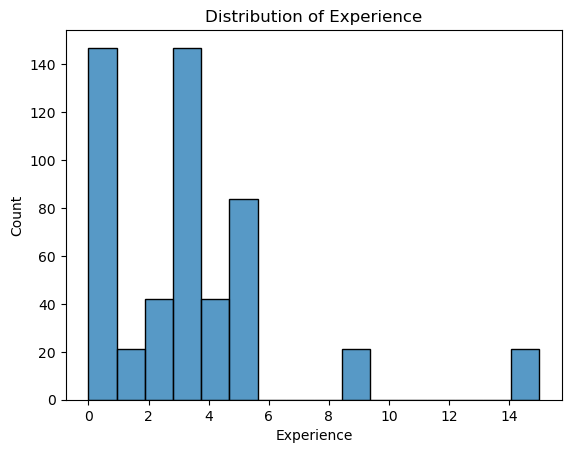

In [9]:
# Distribution of experience
sns.histplot(data['Experience'].dropna())
plt.title('Distribution of Experience')

OBSERVATION: Here we can see that more job posting for applicat who are freshers or having experience less than 3 years is around 200+ jobs, and few jobs for experienced people(like 5 years) which are in between 50 to 70 jobs.

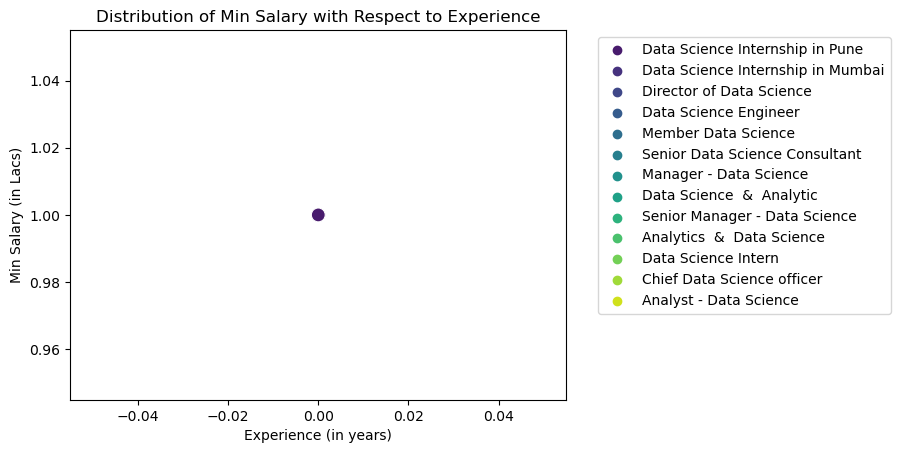

In [10]:
# Scatter plot for min salary vs experience
sns.scatterplot(x='Experience', y='Min Salary', data=data, hue='Job Title', palette='viridis', s=100)

# Set the title and labels
plt.title('Distribution of Min Salary with Respect to Experience')
plt.xlabel('Experience (in years)')
plt.ylabel('Min Salary (in Lacs)')

# Show the plot
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

OBSERVATION: From here we can idea that min salary is 1 lakh for a trinee , and the minimum salary for 2 year experience is in between 3 to 4 lakh, and for 5 year experience is somewhere getting 3 lakh (may be he was not haing exp in this domain).

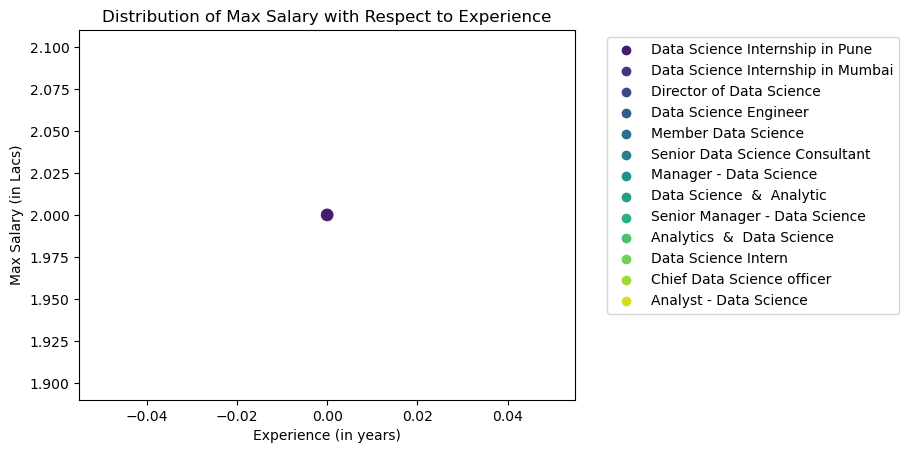

In [11]:
# Scatter plot for max salary vs experience
sns.scatterplot(x='Experience', y='Max Salary', data=data, hue='Job Title', palette='viridis', s=100)

# Set the title and labels
plt.title('Distribution of Max Salary with Respect to Experience')
plt.xlabel('Experience (in years)')
plt.ylabel('Max Salary (in Lacs)')

# Show the plot
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()


OBSERVATION: Here we can see that Intern's are getting max 2 lakh, and 2+ years experience people are getting 9 lakh which is amazing, and 5+ years experience people are getting 10+ lakh.

Text(0.5, 1.0, 'Job Title Count')

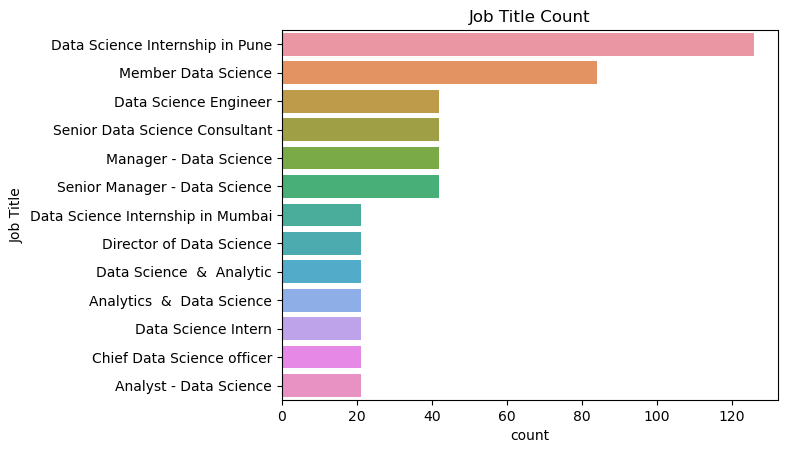

In [12]:
# Job title count
sns.countplot(y=data['Job Title'], order=data['Job Title'].value_counts().index)
plt.title('Job Title Count')

OBSERVATION: This graph is showing the count of job titles, from here we can see the increasing demand for experienced data science, interns are having less jobs.

Text(0.5, 1.0, 'City Count')

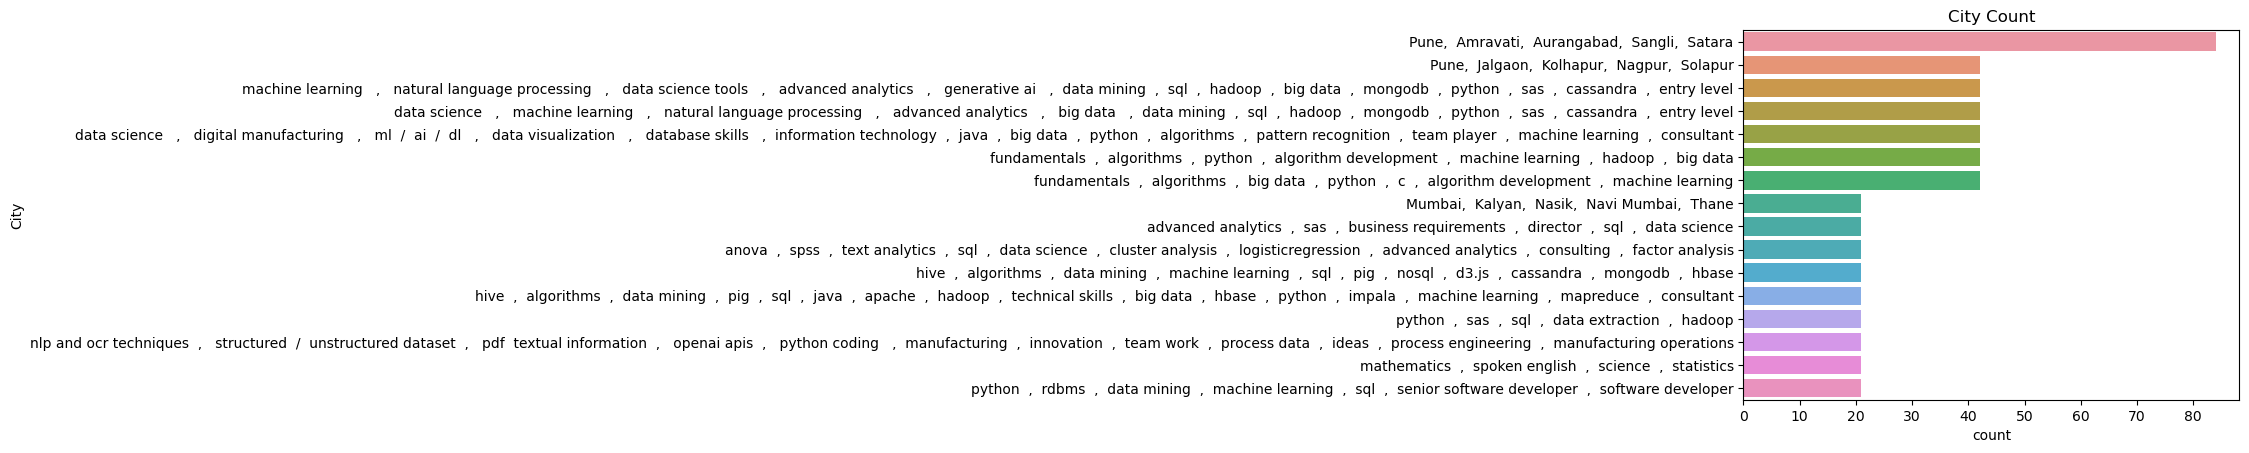

In [13]:
# City count
sns.countplot(y=data['City'], order=data['City'].value_counts().index)
plt.title('City Count')

OBSERVATION: From here we can see higher job posing form Mumbai side. and in this column we are getting some noise in data.

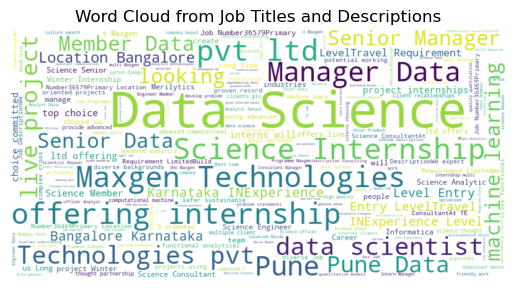

In [14]:
# Concatenate job titles and descriptions for wordcloud
text_data = ' '.join(data['Job Title'].dropna()) + ' '.join(data['Description'].dropna())

# word cloud chart
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text_data)

# Plot the WordCloud image
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud from Job Titles and Descriptions')
plt.show()

OBSERVATION: This word cloud will show higher the count of data bigger the size of the text, here job title Data Science is having higher count/or higher job position/posting.

End Of Notebook...